# Irisデータセットで多クラス分類に挑戦!

### Irisデータセットとは
Iris(アヤメ)データセットは、データサイエンスの世界でもっとも有名なデータセットのひとつ  
3種類のアヤメの花において、がく片（sepal）の長さ、幅、および、花弁（petal）の長さ、幅の4系列の指標を取得したデータセット

<img src="https://disassemble-channel.com/wp-content/uploads/2022/09/setosa_versicolor_virginica.png" width="600px">

### 勉強会の流れ
- 必要なライブラリをインストールする
- データセットを確認する
- データの前処理を行う
- 訓練データとテストデータに分ける
- 訓練データでモデルを作成する
- テストデータでモデルの性能を確認する

### 必要なライブラリのインストール
"ModuleNotFoundError"が出たら、不足分をpipでインストールする 
- pandasがない→ pip install pandas
- seabornがない→ pip install seaborn
- sklearnがない→ pip install scikit-learn

In [1]:
import pandas as pd #表計算
import matplotlib.pyplot as plt #グラフ描画
import seaborn as sns #グラフ描画

#機械学習のライブラリscikit-learn
from sklearn.preprocessing import LabelEncoder #データの前処理
from sklearn.model_selection import train_test_split #データ分割用
from sklearn.ensemble import RandomForestClassifier #モデル(ランダムフォレスト)
from sklearn.neighbors import KNeighborsClassifier #モデル（k近傍法）
from sklearn.metrics import accuracy_score #性能評価
from sklearn.metrics import confusion_matrix #性能評価

### データセットを確認する

In [2]:
iris = sns.load_dataset('iris') #データセットの読み込み
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.groupby("species").count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


### 補足：データフレーム操作のおさらい

In [5]:
#speciesの列だけ表示できる
iris["species"]

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [6]:
# 後ろに =="setosa" を付けると boolとして返ってくる
iris["species"] == "setosa" # setosaのみTrue

0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: species, Length: 150, dtype: bool

In [7]:
# boolの結果をiris[***]に入れると、setosaだけ抽出できる
iris[iris["species"]=="setosa"]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


### グラフで確認する

In [8]:
#花の種類ごとにデータフレームを用意する
se = iris[iris["species"]=="setosa"]
co = iris[iris["species"]=="versicolor"]
ni = iris[iris["species"]=="virginica"]

(array([ 4.,  1.,  6.,  5., 12.,  8.,  4.,  5.,  2.,  3.]),
 array([4.3 , 4.45, 4.6 , 4.75, 4.9 , 5.05, 5.2 , 5.35, 5.5 , 5.65, 5.8 ]),
 <BarContainer object of 10 artists>)

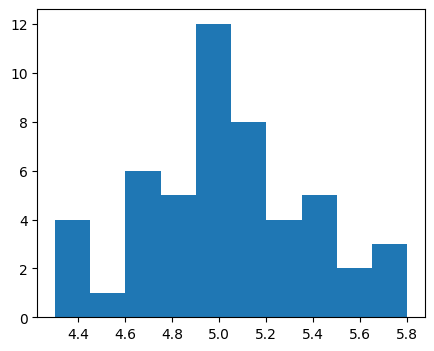

In [9]:
#setosaのsepal_lengthだけ見てみる
plt.figure(figsize=(5,4))
plt.hist(se["sepal_length"])

Text(0.5, 1.0, 'virginica')

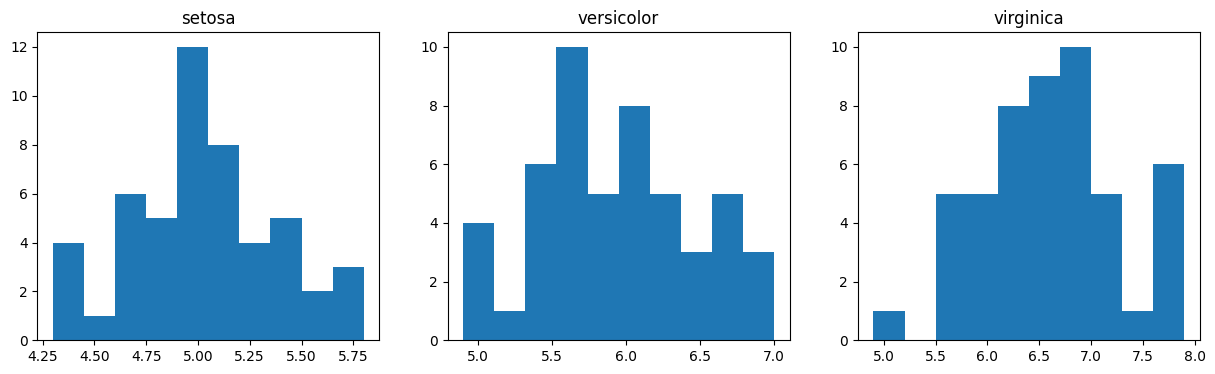

In [10]:
#横に並べてみる
plt.figure(figsize=(15,4))

plt.subplot(1,3,1) #(縦の数, 横の数, 表示させたい位置)  
plt.hist(se["sepal_length"])
plt.title("setosa")

plt.subplot(1,3,2)
plt.hist(co["sepal_length"])
plt.title("versicolor")

plt.subplot(1,3,3)
plt.hist(ni["sepal_length"])
plt.title("virginica")

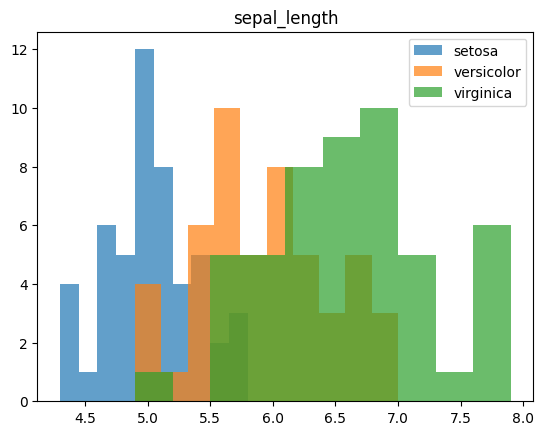

In [11]:
#重ねてみる
plt.hist(se["sepal_length"], label="setosa", alpha=0.7) #alphaは透過率
plt.hist(co["sepal_length"], label="versicolor", alpha=0.7)
plt.hist(ni["sepal_length"], label="virginica", alpha=0.7)
plt.title("sepal_length")
plt.legend()

Text(0, 0.5, 'petal_width')

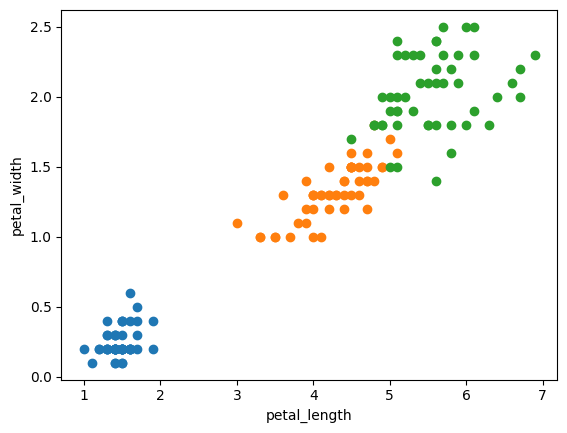

In [12]:
#散布図でも見てみる
plt.scatter(se["petal_length"], se["petal_width"], label="setosa")
plt.scatter(co["petal_length"], co["petal_width"], label="versicolor")
plt.scatter(ni["petal_length"], ni["petal_width"], label="virginica")
plt.xlabel("petal_length")
plt.ylabel("petal_width")

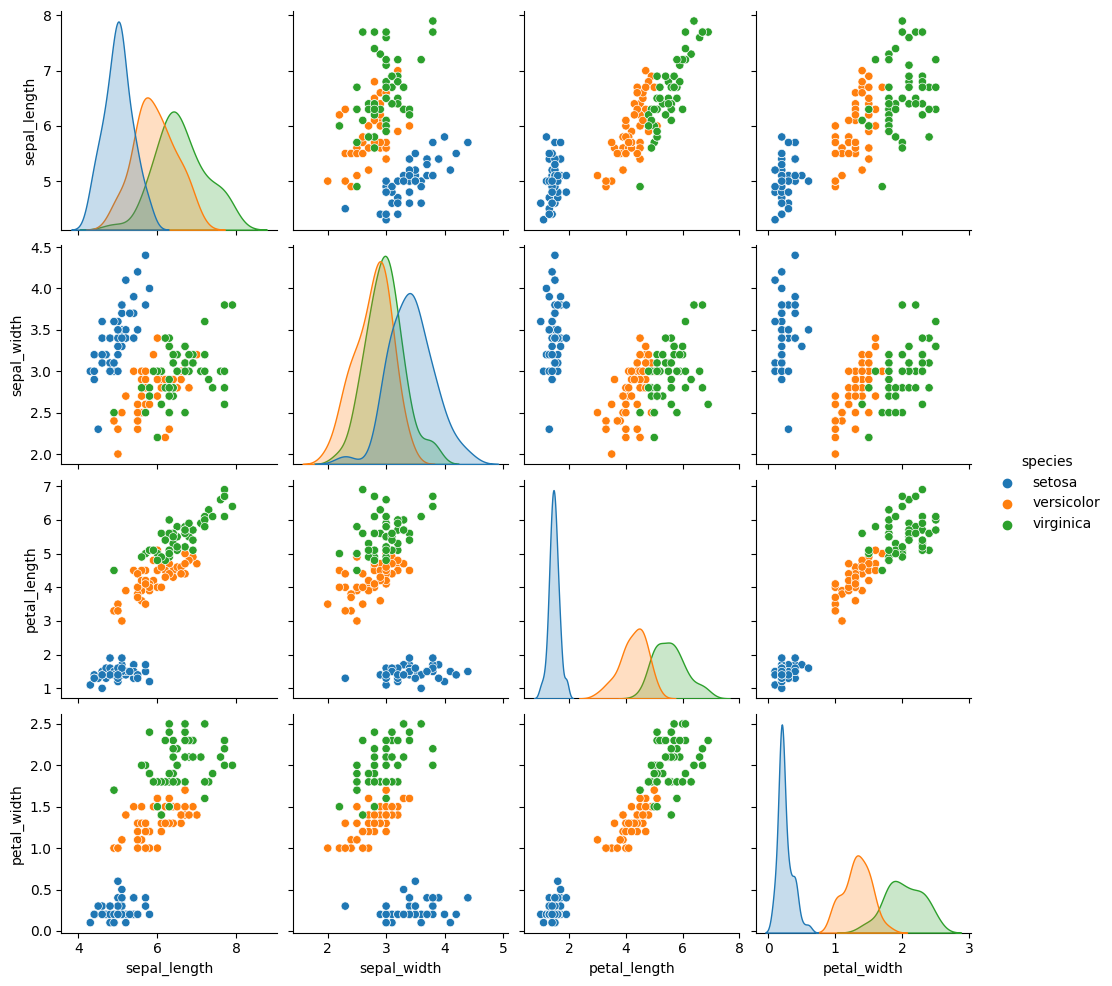

In [13]:
#seabornのpairplotを使ってみる
sns.pairplot(iris, hue="species")

### データの前処理

In [14]:
#ラベルエンコーディングする
le = LabelEncoder()
iris["target"] = le.fit_transform(iris["species"].values)
iris

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [15]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'target'],
      dtype='object')

In [16]:
#targetのみのデータを作成
target = iris["target"]
target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [17]:
#sepalとpetalのみのデータを作成
data = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 訓練データとテストデータに分ける

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data, #説明変数：予測するために使いたいデータ
                                                    target, #目的変数：予測したいデータ
                                                    test_size=0.2, #テストデータのサイズ割合
                                                    stratify=target, #ラベルを均等分割
                                                    random_state=510)

#X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=510)

In [19]:
len(y_train), len(y_test)

(120, 30)

In [20]:
y_train.value_counts()

target
2    40
0    40
1    40
Name: count, dtype: int64

In [21]:
y_test.value_counts()

target
2    10
1    10
0    10
Name: count, dtype: int64

### 訓練データからモデルを作成する

#### ランダムフォレスト
https://mathwords.net/randomforest

In [22]:
#モデルの作成
model = RandomForestClassifier() #モデルの定義
model.fit(X_train, y_train) #訓練データから学習する

RandomForestClassifier()

In [23]:
y_pred = model.predict(X_test)
y_pred

array([2, 2, 2, 0, 0, 0, 1, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 1, 0, 1, 0, 2,
       2, 0, 2, 2, 1, 1, 0, 1])

In [24]:
accuracy_score(y_test, y_pred)

0.9333333333333333

Text(77.92222222222227, 0.5, 'actual')

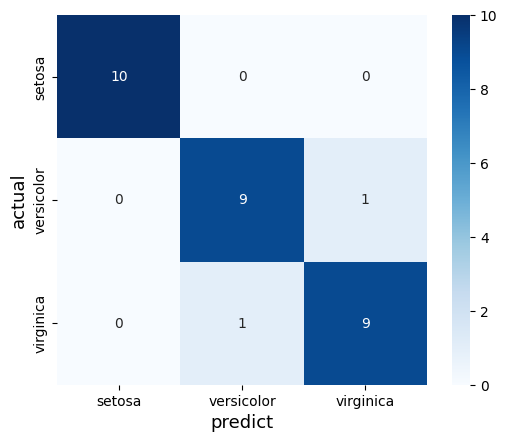

In [25]:
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(data=cm, index=["setosa", "versicolor", "virginica"], columns=["setosa", "versicolor", "virginica"])
sns.heatmap(cm, square=True, cbar=True, annot=True, cmap='Blues')
plt.xlabel("predict", fontsize=13)
plt.ylabel("actual", fontsize=13)

#### k近傍法  
https://toukei-lab.com/%EF%BD%8B%E8%BF%91%E5%82%8D%E6%B3%95

In [26]:
#モデルの作成
model = KNeighborsClassifier(n_neighbors=5) #モデルの定義
model.fit(X_train, y_train) #訓練データから学習する

KNeighborsClassifier()

In [27]:
y_pred = model.predict(X_test)
y_pred

array([2, 2, 1, 0, 0, 0, 1, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 1, 0, 1, 0, 2,
       2, 0, 2, 2, 1, 1, 0, 1])

In [28]:
accuracy_score(y_test, y_pred)

0.9666666666666667

Text(77.92222222222227, 0.5, 'actual')

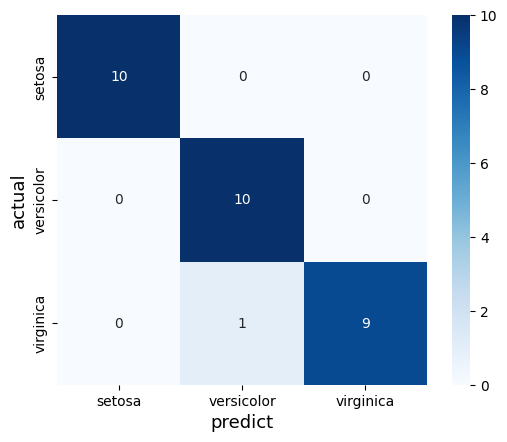

In [29]:
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(data=cm, index=["setosa", "versicolor", "virginica"], columns=["setosa", "versicolor", "virginica"])
sns.heatmap(cm, square=True, cbar=True, annot=True, cmap='Blues')
plt.xlabel("predict", fontsize=13)
plt.ylabel("actual", fontsize=13)